In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# set max_colwidth option to None
pd.set_option('max_colwidth', None)
# Read CSV file into DataFrame
df = pd.read_csv('../linear_minmax.csv')

# Filter DataFrame to show only rows where 'accuracy' > 0.6 and 'duration' < 30
df_filtered = df.loc[(df['accuracy'] > 0.6) & (df['duration'] < 30)]

# Sort filtered DataFrame by 'accuracy' column in descending order
df_sorted = df_filtered.sort_values('accuracy', ascending=False)

# Display top 50 rows of sorted DataFrame
df_sorted.head(100)



,model,duration,best_features,accuracy
65,RFE_RandomForest,12,"['turnover', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.649847
5,RFE_RandomForest,3,"['turnover', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.643831
45,RFE_RandomForest,9,"['volume', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.638623
145,RFE_RandomForest,24,"['turnover', 'avg_vol_last_100', 'MACDh_12_26_9', 'R3', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHd_14_3_3', 'ATR', 'CCI']",0.632913
25,RFE_RandomForest,6,"['turnover', 'avg_vol_last_100', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.629503
85,RFE_RandomForest,15,"['volume', 'MACDs_12_26_9', 'BBB_5_2.0', 'BBP_5_2.0', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.626573
165,RFE_RandomForest,27,"['turnover', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHd_14_3_3', 'ATR', 'CCI']",0.624021
105,RFE_RandomForest,18,"['volume', 'turnover', 'avg_vol_last_100', 'MACDh_12_26_9', 'MACDs_12_26_9', 'R3', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR', 'ROC', 'CCI']",0.621804
125,RFE_RandomForest,21,"['turnover', 'avg_vol_last_100', 'BBB_5_2.0', 'BBP_5_2.0', 'STOCHd_14_3_3', 'ROC', 'CCI']",0.617946
70,SelectKBest_RandomForest,12,"['time', 'volume', 'turnover', 'avg_vol_last_100', 'BBB_5_2.0', 'BBP_5_2.0', 'RSI', 'STOCHk_14_3_3', 'ATR', 'CCI']",0.608748


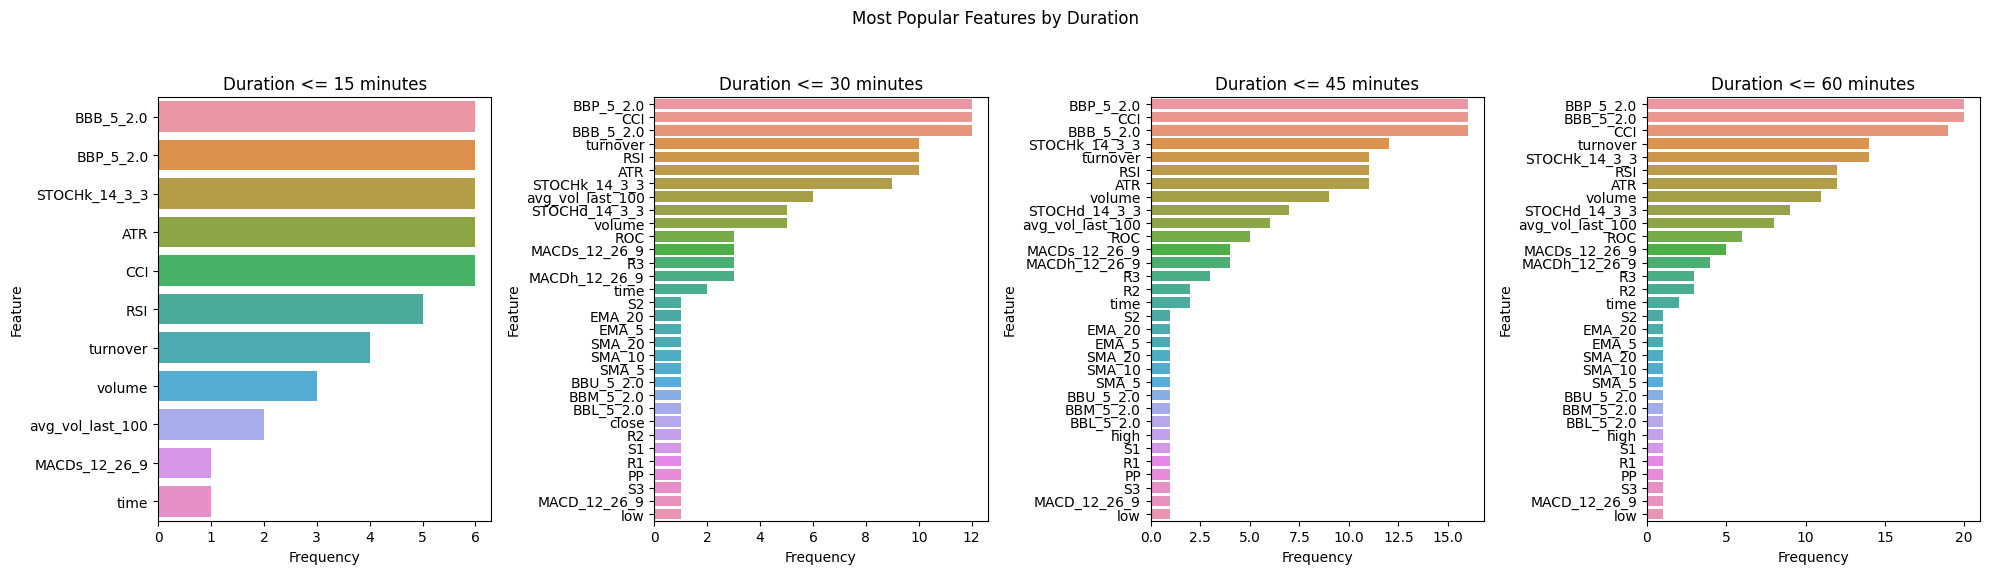

In [15]:
durations = [15, 30, 45, 60]
num_features = 32
min_frequency = 1

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Most Popular Features by Duration')

for index, duration in enumerate(durations):
    # Filter DataFrame based on the duration and accuracy threshold
    df_filtered = df.loc[(df['accuracy'] > 0.6) & (df['duration'] <= duration)]

    # Sort filtered DataFrame by 'accuracy' column in descending order
    df_sorted = df_filtered.sort_values('accuracy', ascending=False)

    # Extract feature lists from the 'best_features' column and create a single list of all features
    all_features = []
    for feature_list_str in df_sorted['best_features']:
        feature_list = eval(feature_list_str)  # Convert the string representation of a list to an actual list
        all_features.extend(feature_list)

    # Count the occurrences of each feature
    feature_counts = pd.Series(all_features).value_counts()

    # Filter feature counts to only show features with a count of 10 or more
    feature_counts_filtered = feature_counts[feature_counts >= min_frequency]

    if not feature_counts_filtered.empty:  # Check if feature_counts_filtered is not empty
        # Create a bar plot with the top features for the given duration
        sns.barplot(x=feature_counts_filtered.head(num_features).values, y=feature_counts_filtered.head(num_features).index, ax=axes[index])
        axes[index].set_title(f'Duration <= {duration} minutes')
        axes[index].set_xlabel('Frequency')
        axes[index].set_ylabel('Feature')
    else:
        axes[index].set_title(f'Duration <= {duration} minutes (No Data)')
        axes[index].set_xticks([])
        axes[index].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.show()




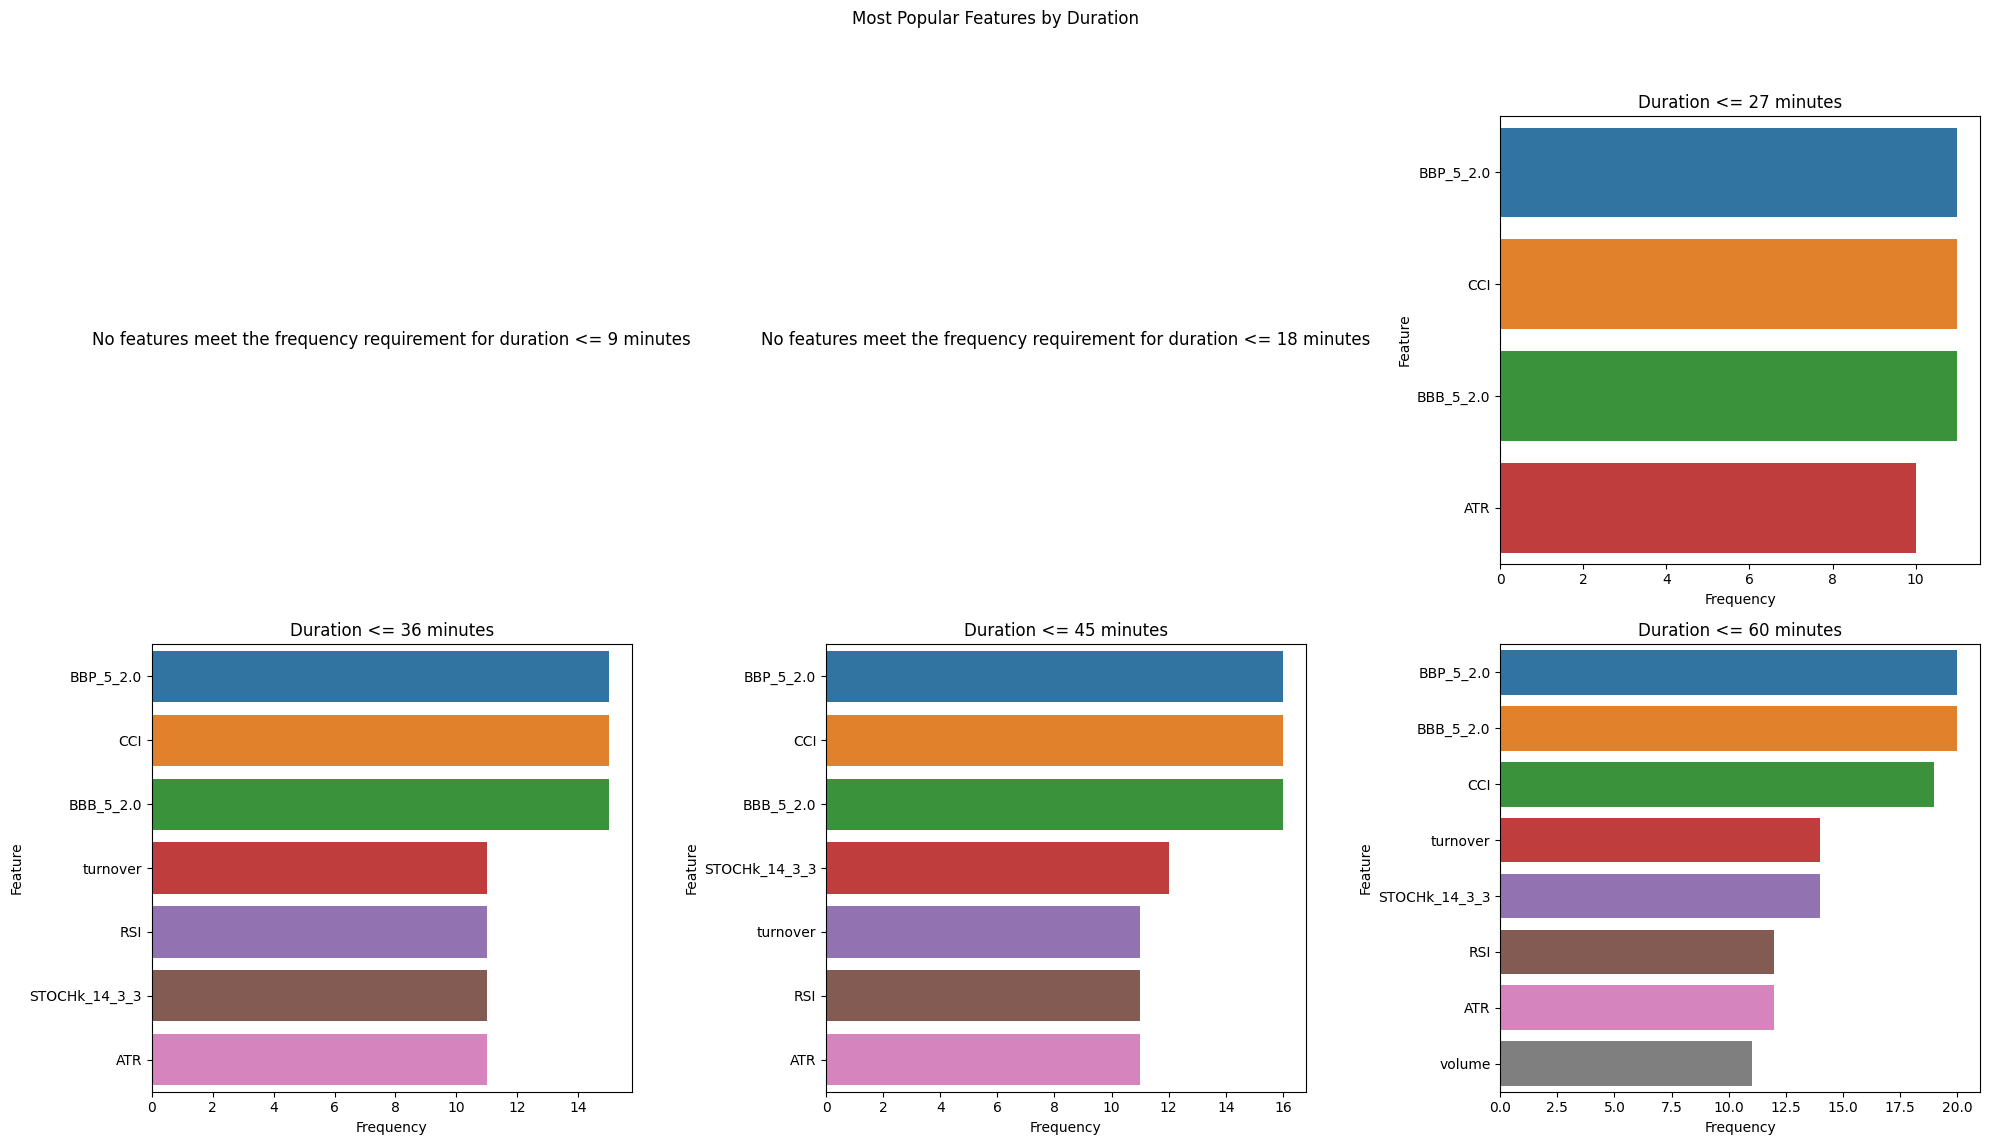

In [13]:
durations = [9, 18, 27, 36, 45, 60]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Most Popular Features by Duration')

for index, duration in enumerate(durations):
    row = index // 3
    col = index % 3

    # Filter DataFrame based on the duration and accuracy threshold
    df_filtered = df.loc[(df['accuracy'] > 0.6) & (df['duration'] <= duration)]

    # Sort filtered DataFrame by 'accuracy' column in descending order
    df_sorted = df_filtered.sort_values('accuracy', ascending=False)

    # Extract feature lists from the 'best_features' column and create a single list of all features
    all_features = []
    for feature_list_str in df_sorted['best_features']:
        feature_list = eval(feature_list_str)  # Convert the string representation of a list to an actual list
        all_features.extend(feature_list)

    # Count the occurrences of each feature
    feature_counts = pd.Series(all_features).value_counts()

    # Filter feature counts to only show features with a count of 10 or more
    feature_counts_filtered = feature_counts[feature_counts >= min_frequency]

    if not feature_counts_filtered.empty:
        # Create a bar plot with the top features for the given duration
        sns.barplot(x=feature_counts_filtered.head(num_features).values, y=feature_counts_filtered.head(num_features).index, ax=axes[row][col])
        axes[row][col].set_title(f'Duration <= {duration} minutes')
        axes[row][col].set_xlabel('Frequency')
        axes[row][col].set_ylabel('Feature')
    else:
        axes[row][col].text(0.5, 0.5, f'No features meet the frequency requirement for duration <= {duration} minutes', fontsize=12, ha='center', va='center')
        axes[row][col].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.show()


In [14]:
# Load the data from the two different files
df1 = pd.read_csv('../linear_mm_results.csv')
df2 = pd.read_csv('../linear_standard_results.csv')

durations = [18, 27, 36]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Most Popular Features by Duration (Side by Side)')

def plot_charts(df, axes_row, label):
    for index, duration in enumerate(durations):
        col = index

        # Filter DataFrame based on the duration and accuracy threshold
        df_filtered = df.loc[(df['accuracy'] > 0.6) & (df['duration'] <= duration)]

        # Sort filtered DataFrame by 'accuracy' column in descending order
        df_sorted = df_filtered.sort_values('accuracy', ascending=False)

        # Extract feature lists from the 'best_features' column and create a single list of all features
        all_features = []
        for feature_list_str in df_sorted['best_features']:
            feature_list = eval(feature_list_str)  # Convert the string representation of a list to an actual list
            all_features.extend(feature_list)

        # Count the occurrences of each feature
        feature_counts = pd.Series(all_features).value_counts()

        # Filter feature counts to only show features with a count of 10 or more
        feature_counts_filtered = feature_counts[feature_counts >= min_frequency]

        if not feature_counts_filtered.empty:
            # Create a bar plot with the top features for the given duration
            sns.barplot(x=feature_counts_filtered.head(num_features).values, y=feature_counts_filtered.head(num_features).index, ax=axes[axes_row][col])
            axes[axes_row][col].set_title(f'{label} - Duration <= {duration} minutes')
            axes[axes_row][col].set_xlabel('Frequency')
            axes[axes_row][col].set_ylabel('Feature')
        else:
            axes[axes_row][col].text(0.5, 0.5, f'No features meet the frequency requirement for {label} - duration <= {duration} minutes', fontsize=12, ha='center', va='center')
            axes[axes_row][col].axis('off')

plot_charts(df1, 0, 'minmax')
plot_charts(df2, 1, 'standard')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for better spacing
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '../linear_mm_results.csv'